In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from PIL import Image

from py.mKMeans import KMeans, KMeansPlus, SoftKMeans, EnhancedSoftKMeans, EnhancedKMeans
from py.mPCA import PCA
from py.PY_LinearAutoEncoder import LinearAutoEncoder

%matplotlib inline

In [117]:
size = 128
def getProcessedArray(image_path, d_dimension):

    img = Image.open(image_path).resize((size,size))

    # 将图像转换为numpy数组
    img_np = np.array(img)


    # 将图像数据转换为二维数组，形状为 (像素数, 颜色通道数)
    X = img_np.reshape(-1, 3)
    
    # 初始化PCA，假设我们要将每个通道的维度降低到2
    pca = PCA()
    # 训练PCA
    X_pca = pca.transform(X,d_dimension)
    # 重构图像数据
    X_reconstructed = pca.inverse_transform(X_pca,d_dimension)
    
    # 重构的图像将缺少一个颜色通道，我们可以将其设置为零
    # 假设我们保留了RG，那么我们将B通道设为0
    
    B_zeros = np.zeros((X_reconstructed.shape[0], 3-d_dimension))
    # if d_dimension == 3:
    #     X_reconstructed_with_B1 = X_pca
    # else:
    print('shape of pca is:', X_pca.shape)
    X_reconstructed_with_B1 = np.hstack((X_pca, B_zeros))
    # img_reconstructed_np1 = X_reconstructed_with_B1.reshape(size,size, 3).astype(np.uint8)
    # X_reconstructed_with_B1.resize().show()
    X_reconstructed_with_B = X_reconstructed
    # print('shape of X_reconstructed_with_B1:', img_reconstructed_np1.shape)
    # 将重构的数据转换回图像格式
    img_reconstructed_np = X_reconstructed_with_B.reshape(size,size, 3).astype(np.uint8)
    return  X_reconstructed_with_B1, img_reconstructed_np

has not trained!
shape of t is:
(3, 3)
shape of pca is: (16384, 3)
has not trained!
shape of t is:
(2, 3)
shape of pca is: (16384, 2)
has not trained!
shape of t is:
(1, 3)
shape of pca is: (16384, 1)


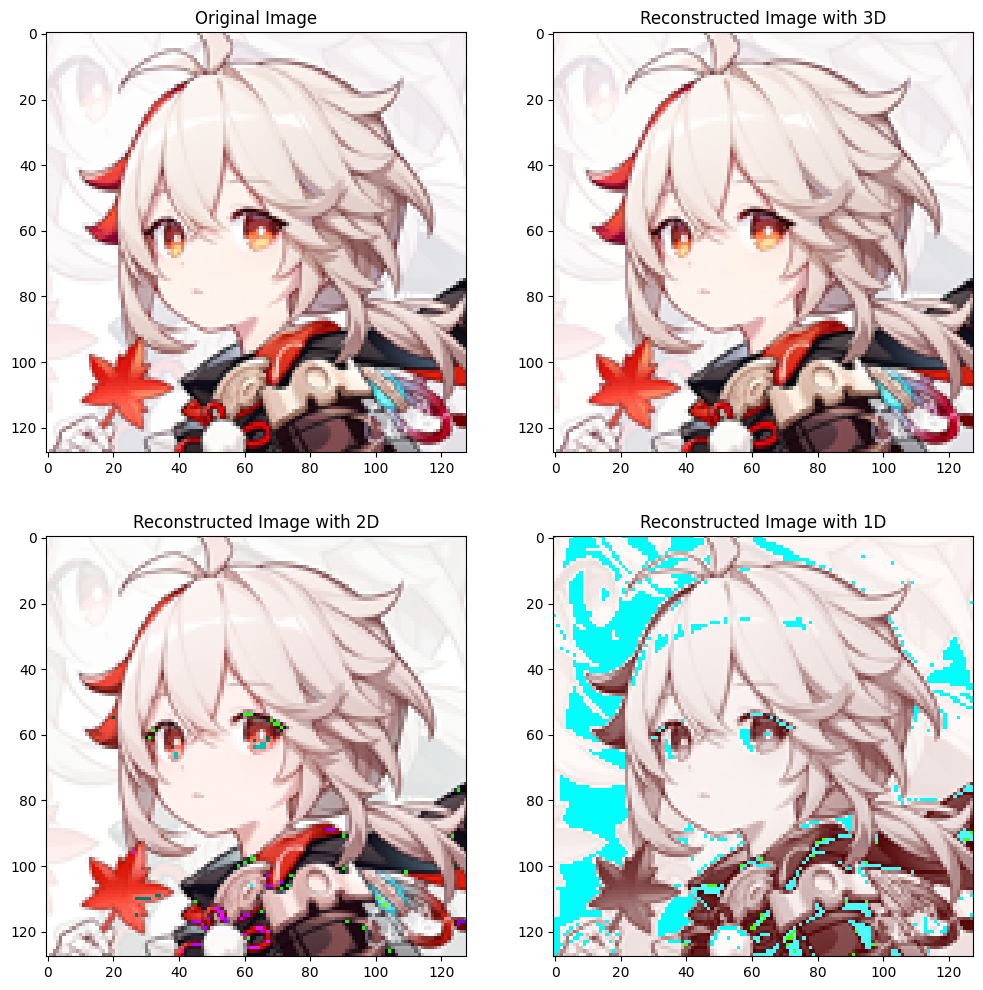

In [118]:
image_path = 'statics/kazuha2.jpg'

img = Image.open(image_path).resize((size,size))

# 将图像转换为numpy数组
img_np = np.array(img)

# 分离RGB通道
R = img_np[:, :, 0].flatten()
G = img_np[:, :, 1].flatten()
B = img_np[:, :, 2].flatten()

# 将图像数据转换为二维数组，形状为 (像素数, 颜色通道数)
X = img_np.reshape(-1, 3)

# getProcessedArray(image_path, 2);
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

img_3d, img_3d_reconstruct = getProcessedArray(image_path, 3)
img_2d, img_2d_reconstruct = getProcessedArray(image_path, 2)
img_1d, img_1d_reconstruct = getProcessedArray(image_path, 1)

plt.subplot(2,2,2)
plt.imshow(img_3d_reconstruct)
plt.title('Reconstructed Image with 3D')

plt.subplot(2,2,3)
plt.imshow(img_2d_reconstruct)
plt.title('Reconstructed Image with 2D')

plt.subplot(2,2,4)
plt.imshow(img_1d_reconstruct)
plt.title('Reconstructed Image with 1D')

plt.show()
# img_reconstructed = Image.fromarray(img_reconstructed_np)
# 
# # 显示重构的图像
# img_reconstructed.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(65536, 3)
(65536, 3)
(65536, 3)


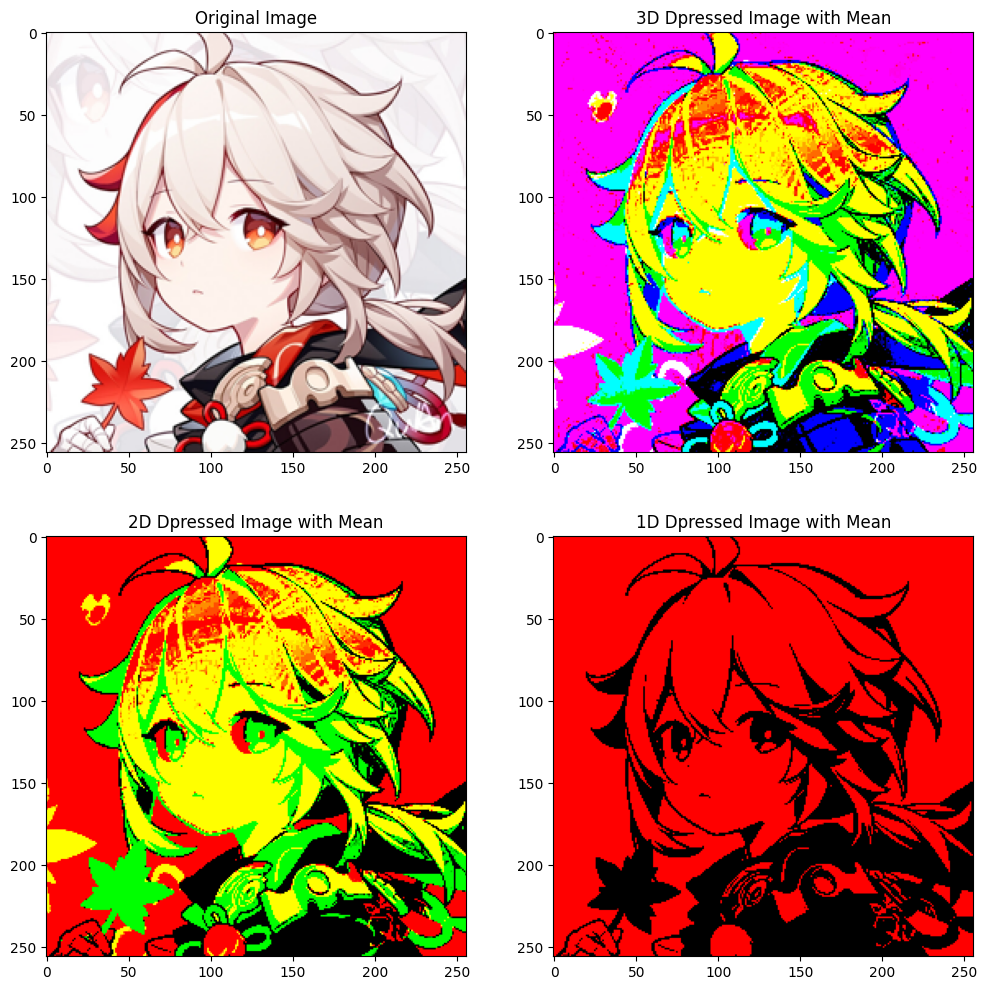

In [79]:
img_1d = np.array(img_1d)
img_2d = np.array(img_2d)
img_3d = np.array(img_3d)

print(img_1d.shape)
print(img_2d.shape)
print(img_3d.shape)

img_1d = np.resize(img_1d, (size,size,3))
img_2d = np.resize(img_2d, (size,size,3))
img_3d = np.resize(img_3d, (size,size,3))

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(img_3d)
plt.title('3D Dpressed Image with Mean')

plt.subplot(2,2,3)
plt.imshow(img_2d)
plt.title('2D Dpressed Image with Mean')

plt.subplot(2,2,4)
plt.imshow(img_1d)
plt.title('1D Dpressed Image with Mean')

plt.show()

In [23]:
def getAutoencodedImage(image_path, hidden_size, epochs, learning_rate):
    # 打开并调整图像大小
    img = Image.open(image_path).resize((size, size))
    # 将图像转换为numpy数组
    img_np = np.array(img)
    # 将图像数据转换为二维数组，形状为 (像素数, 颜色通道数)
    X = img_np.reshape(-1, 3)

    # 创建自动编码器实例
    autoencoder = LinearAutoEncoder(input_size=3, hidden_size=hidden_size)
    # 训练自动编码器
    autoencoder.train(X,epochs=epochs,learning_rate=learning_rate)
    # 获取编码（压缩）和解码（重建）结果
    encoded, decoded = autoencoder.forward(X)

    # 如果编码的维度小于3，我们需要补充零以保持RGB格式
    if hidden_size < 3:
        zeros_to_add = np.zeros((encoded.shape[0], 3 - hidden_size))
        encoded = np.hstack((encoded, zeros_to_add))

    # 将编码后的数据转换回图像格式
    img_encoded_np = encoded.reshape(size, size, 3).astype(np.uint8)
    # 将解码后的数据转换回图像格式
    img_decoded_np = decoded.reshape(size, size, 3).astype(np.uint8)
    loss = autoencoder.getLoss()
    return img_encoded_np, img_decoded_np, loss

# 调用函数
# 假设hidden_size是你想要的目标压缩维度
# hidden_size = 3  # 例如，将颜色通道压缩到2

In [98]:
compressed_image_3d, reconstructed_image_3d, loss_3d = getAutoencodedImage(image_path, 3,2000,0.001)

Epoch 0, Loss: 168443.59238066775
Epoch 100, Loss: 62235.65448534779
Epoch 200, Loss: 17240.22963515179
Epoch 300, Loss: 1070.8567128124273
Epoch 400, Loss: 83.31058395333129
Epoch 500, Loss: 83.05701824833456
Epoch 600, Loss: 82.84487427461947
Epoch 700, Loss: 82.59907746737677
Epoch 800, Loss: 82.3681922259859
Epoch 900, Loss: 82.16757929522292
Epoch 1000, Loss: 81.94459382743251
Epoch 1100, Loss: 81.85000510584852
Epoch 1200, Loss: 81.73521112449855
Epoch 1300, Loss: 81.61374884035443
Epoch 1400, Loss: 81.52305841920644
Epoch 1500, Loss: 81.43561792454706
Epoch 1600, Loss: 81.40662848961698
Epoch 1700, Loss: 81.40662848961698
Epoch 1800, Loss: 81.40662848961698
Epoch 1900, Loss: 81.40662848961698


In [80]:
compressed_image_2d, reconstructed_image_2d, loss_2d = getAutoencodedImage(image_path, 2,2500,0.0009)

Epoch 0, Loss: 100851.75305092435
Epoch 100, Loss: 58308.54059234547
Epoch 200, Loss: 38346.7022909142
Epoch 300, Loss: 27611.537128391992
Epoch 400, Loss: 17136.914185891987
Epoch 500, Loss: 6523.82142867301
Epoch 600, Loss: 1430.0096621605753
Epoch 700, Loss: 964.6813847223742
Epoch 800, Loss: 659.2975396731669
Epoch 900, Loss: 434.1552692218841
Epoch 1000, Loss: 265.4570846751377
Epoch 1100, Loss: 139.13046066079892
Epoch 1200, Loss: 82.13384167095329
Epoch 1300, Loss: 62.09339680618854
Epoch 1400, Loss: 56.48323995061352
Epoch 1500, Loss: 55.825626133197886
Epoch 1600, Loss: 55.496931071140175
Epoch 1700, Loss: 55.312322861649555
Epoch 1800, Loss: 55.15792984707789
Epoch 1900, Loss: 55.1096180909602
Epoch 2000, Loss: 54.904592087695534
Epoch 2100, Loss: 54.85127625647733
Epoch 2200, Loss: 54.75591271111366
Epoch 2300, Loss: 54.62556335297526
Epoch 2400, Loss: 54.582524689092246


In [57]:
compressed_image_1d, reconstructed_image_1d, loss_1d = getAutoencodedImage(image_path, 1,3000,0.0015)

Epoch 0, Loss: 4077275.3871234716
Epoch 100, Loss: 2915978.7071369602
Epoch 200, Loss: 2016467.5632840742
Epoch 300, Loss: 1334088.327282608
Epoch 400, Loss: 832969.4180106152
Epoch 500, Loss: 480558.37011013814
Epoch 600, Loss: 247558.91904391217
Epoch 700, Loss: 108004.43286429626
Epoch 800, Loss: 39989.23167138454
Epoch 900, Loss: 24205.76644647407
Epoch 1000, Loss: 19859.35941272609
Epoch 1100, Loss: 15869.88672552116
Epoch 1200, Loss: 12531.975606022626
Epoch 1300, Loss: 9493.196895756308
Epoch 1400, Loss: 6321.043625504658
Epoch 1500, Loss: 3321.5709883320947
Epoch 1600, Loss: 1132.4980411473878
Epoch 1700, Loss: 415.1401377414206
Epoch 1800, Loss: 414.2360982525626
Epoch 1900, Loss: 413.13785023156225
Epoch 2000, Loss: 412.2106291183031
Epoch 2100, Loss: 411.13320795312393
Epoch 2200, Loss: 409.6165011224096
Epoch 2300, Loss: 408.5599068130516
Epoch 2400, Loss: 407.65686018501145
Epoch 2500, Loss: 406.7548050767487
Epoch 2600, Loss: 405.69486447903336
Epoch 2700, Loss: 404.20332

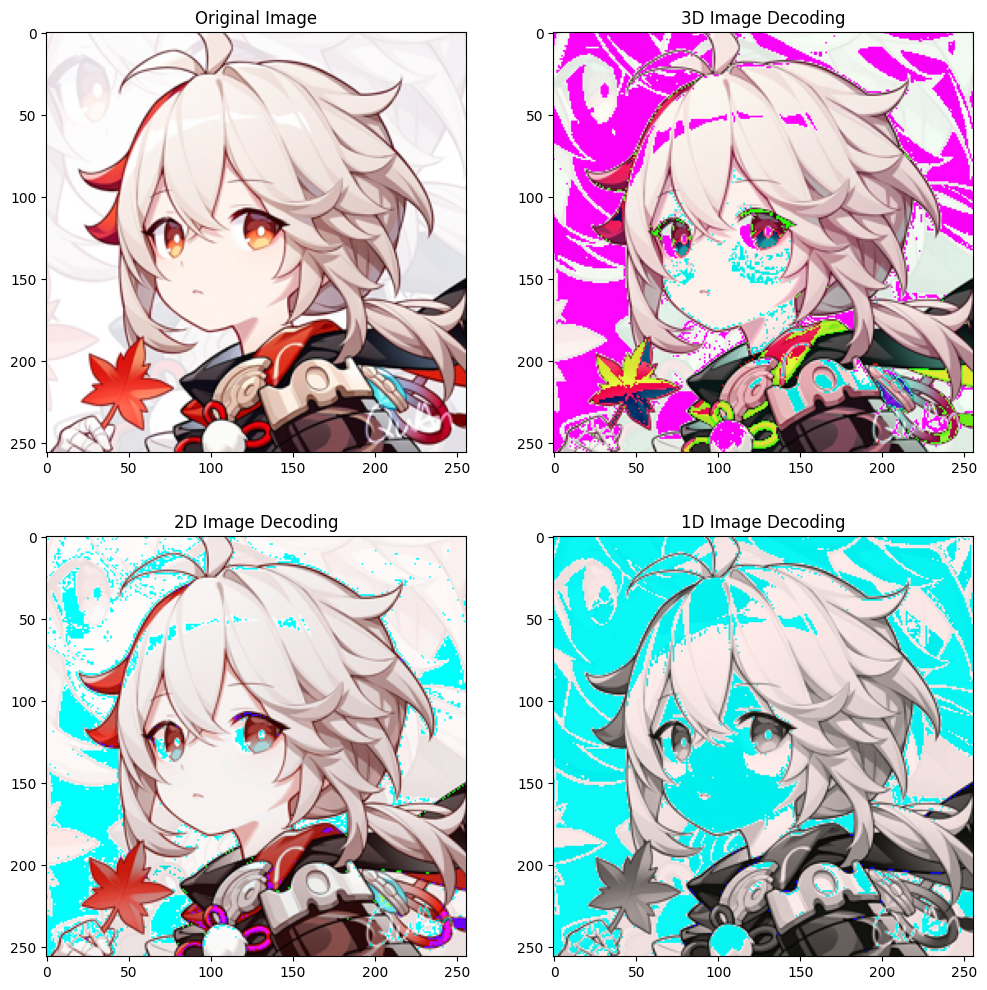

In [99]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(reconstructed_image_3d)
plt.title('3D Image Decoding')

plt.subplot(2,2,3)
plt.imshow(reconstructed_image_2d)
plt.title('2D Image Decoding')

plt.subplot(2,2,4)
plt.imshow(reconstructed_image_1d)
plt.title('1D Image Decoding')
plt.show()

Text(0.5, 1.0, '1D Image Encoding')

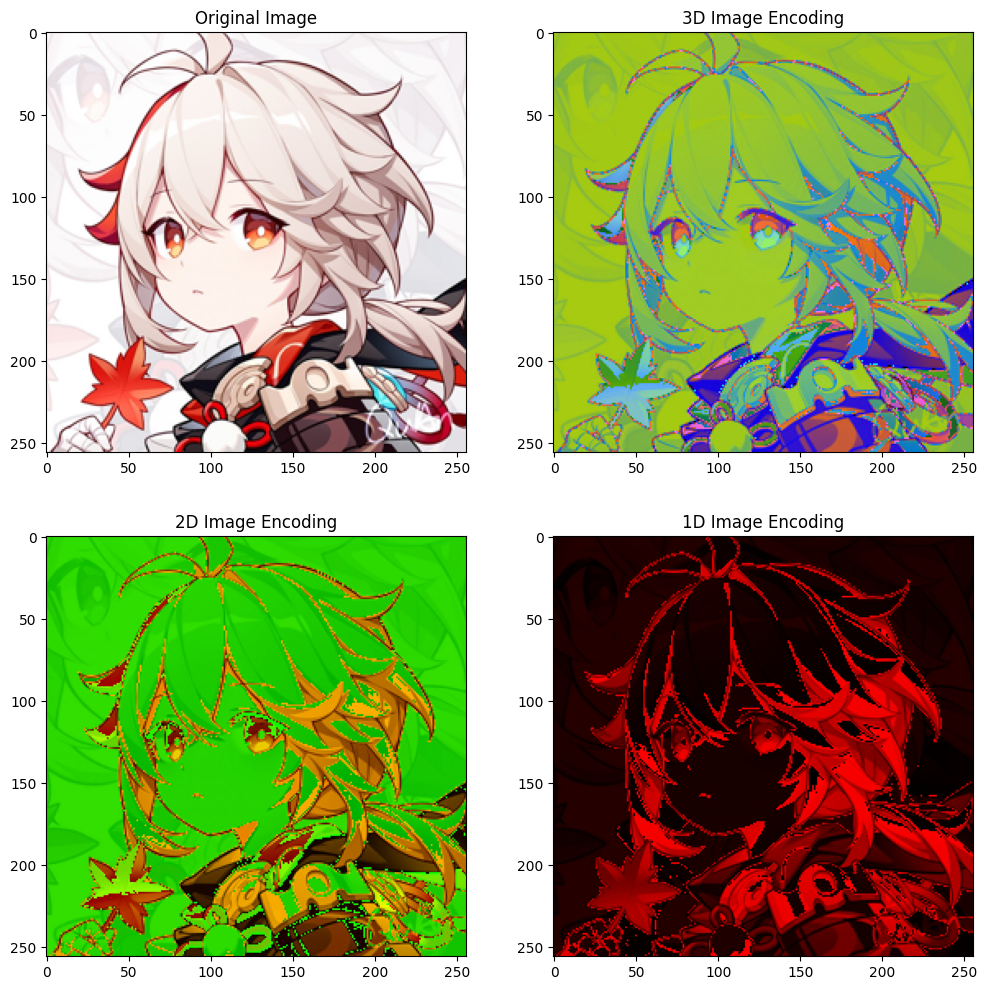

In [100]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(2,2,2)
plt.imshow(compressed_image_3d)
plt.title('3D Image Encoding')

plt.subplot(2,2,3)
plt.imshow(compressed_image_2d)
plt.title('2D Image Encoding')

plt.subplot(2,2,4)
plt.imshow(compressed_image_1d)
plt.title('1D Image Encoding')

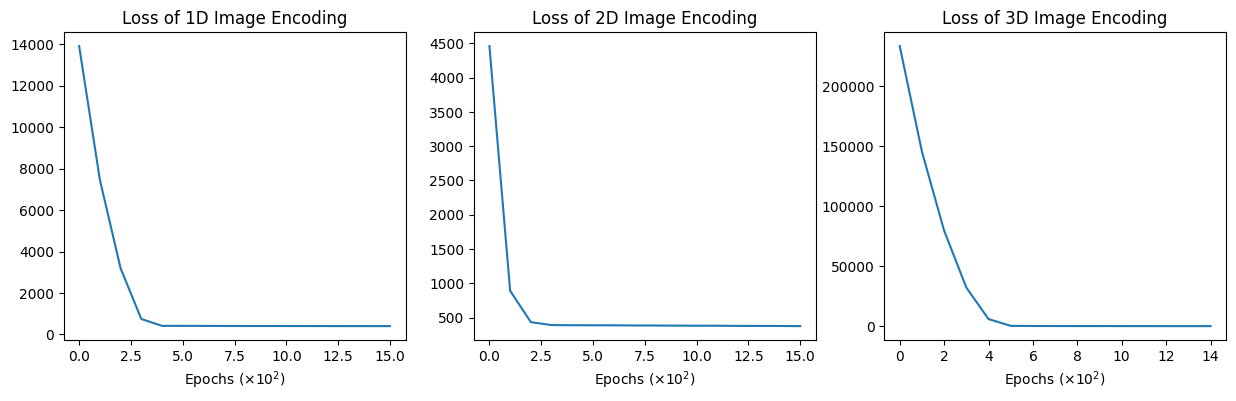

In [47]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.plot(loss_1d[2:])
plt.title('Loss of 1D Image Encoding')
plt.xlabel('Epochs ($\\times 10^2$)')

plt.subplot(1,3,2)
plt.plot(loss_2d[2:])
plt.title('Loss of 2D Image Encoding')
plt.xlabel('Epochs ($\\times 10^2$)')

plt.subplot(1,3,3)
plt.plot(loss_3d[3:])
plt.title('Loss of 3D Image Encoding')
plt.xlabel('Epochs ($\\times 10^2$)')

plt.show()


In [119]:
# 创建PCA实例并训练


# 这里我们假设你已经有一个soft K-means的实现
# soft_kmeans = SoftKMeans(k=k)
# soft_kmeans.fit(X_reconstructed)
# soft_cluster_labels = soft_kmeans.predict(X_reconstructed)

def getPCA_KMeans(X, k, kmeans):
    pca = PCA()
    pca.train(X)
    
    # 选择一个维度k进行降维，例如k=2
    X_pca = pca.transform(X, k)
    
    # 使用inverse_transform恢复降维后的数据
    X_reconstructed = pca.inverse_transform(X_pca, k)
    
    # 将重构的数据转换回图像格式
    img_reconstructed_np = X_reconstructed.reshape(size,size, 3).astype(np.uint8)
    
    # 在这一步，我们需要一个soft K-means的实现
    # sklearn的KMeans不是soft K-means，但我们可以用它作为一个简化的例子
    # 实际上，你需要找到一个soft K-means的实现或者自己编写一个
    # kmeans = KMeansPlus(k=k)
    kmeans.fit(X_reconstructed)
    
    # 获取聚类结果
    cluster_labels = kmeans.labels_
    return img_reconstructed_np, cluster_labels, X_pca, pca

kmeans = KMeans(k=2)
img_reconstructed_np2, cluster_labels2, X_pca2, pca2 = getPCA_KMeans(X, 2, kmeans)


shape of t is:
(2, 3)


In [131]:
kmeans = KMeans(k=1)
img_reconstructed_np1, cluster_labels1, X_pca1, pca1 = getPCA_KMeans(X, 1, kmeans)

shape of t is:
(1, 3)


In [121]:
kmeans3 = KMeans(k=3)
img_reconstructed_np3, cluster_labels3, X_pca3, pca3 = getPCA_KMeans(X, 2, kmeans)

shape of t is:
(2, 3)


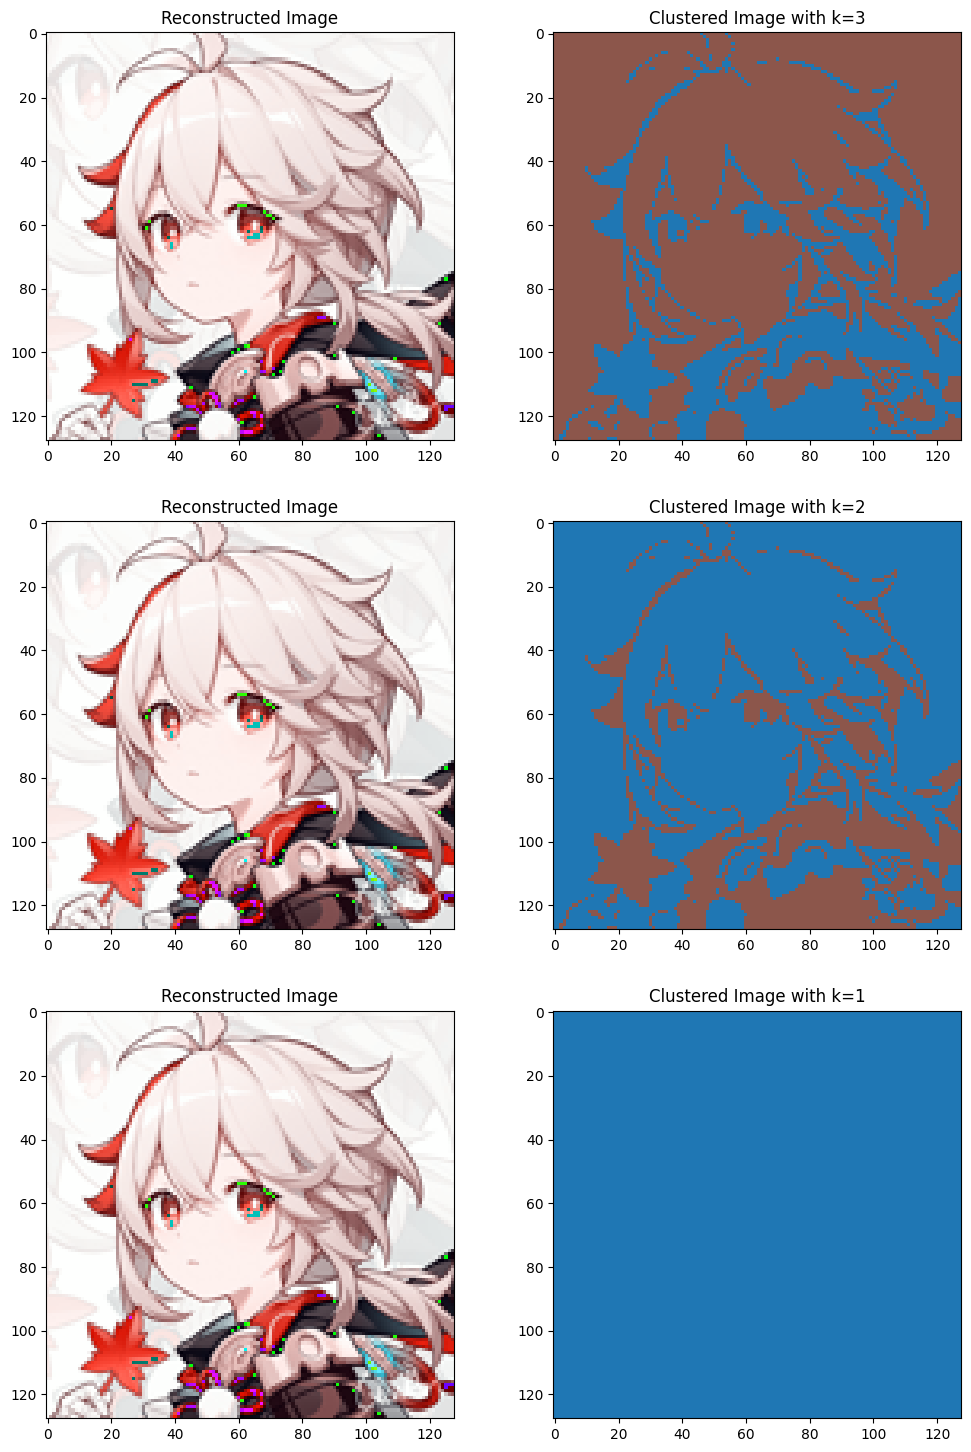

In [132]:
# 可视化重构的图像

plt.figure(figsize=(12, 18))
#k=3
plt.subplot(3,2, 1)
plt.imshow(img_reconstructed_np3)
plt.title('Reconstructed Image')
# plt.axis('off')  # 不显示坐标轴
# plt.show()

# 为聚类标签分配颜色
# 这里我们使用plt.cm.tab10颜色映射，您可以根据需要选择不同的colormap
colors3 = plt.cm.tab10(cluster_labels3.astype(float) / k)

# 聚类颜色图像
clustered_img3 = colors3.reshape(size, size, 4)

# 可视化聚类结果
plt.subplot(3,2, 2)
plt.imshow(clustered_img3)
plt.title('Clustered Image with k=3')




# k =2
plt.subplot(3,2, 3)
plt.imshow(img_reconstructed_np2)
plt.title('Reconstructed Image')
# plt.axis('off')  # 不显示坐标轴
# plt.show()

# 为聚类标签分配颜色
# 这里我们使用plt.cm.tab10颜色映射，您可以根据需要选择不同的colormap
colors2 = plt.cm.tab10(cluster_labels2.astype(float) / k)

# 聚类颜色图像
clustered_img2 = colors2.reshape(size, size, 4)

# 可视化聚类结果
plt.subplot(3,2, 4)
plt.imshow(clustered_img2)
plt.title('Clustered Image with k=2')
# plt.axis('off')  # 不显示坐标轴

# k =1
plt.subplot(3,2, 5)
plt.imshow(img_reconstructed_np3)
plt.title('Reconstructed Image')
# plt.axis('off')  # 不显示坐标轴
# plt.show()

# 为聚类标签分配颜色
# 这里我们使用plt.cm.tab10颜色映射，您可以根据需要选择不同的colormap
colors1 = plt.cm.tab10(cluster_labels1.astype(float) / k)

# 聚类颜色图像
clustered_img1 = colors1.reshape(size, size, 4)

# 可视化聚类结果
plt.subplot(3,2, 6)
plt.imshow(clustered_img1)
plt.title('Clustered Image with k=1')

plt.show()

In [170]:
# 可视化重构的图像
beta = 0.04
sk2 = SoftKMeans(k=2,beta=beta)
sk_img_reconstructed_np2, sk_cluster_labels2, sk_X_pca2, sk_pca2 = getPCA_KMeans(X, 2, sk2)
# w2 = sk2.calculate_responsibilities(X)

shape of t is:
(2, 3)


In [171]:
sk1 = SoftKMeans(k=1,beta=beta)
sk_img_reconstructed_np1, sk_cluster_labels1, sk_X_pca1, sk_pca1 = getPCA_KMeans(X, 1, sk1)

shape of t is:
(1, 3)


In [172]:
sk3 = SoftKMeans(k=3,beta=beta)
sk_img_reconstructed_np3, sk_cluster_labels3, sk_X_pca3, sk_pca3 = getPCA_KMeans(X, 3, sk3)

shape of t is:
(3, 3)


D:\windows\temp\ipykernel_17868\2401454852.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', k)


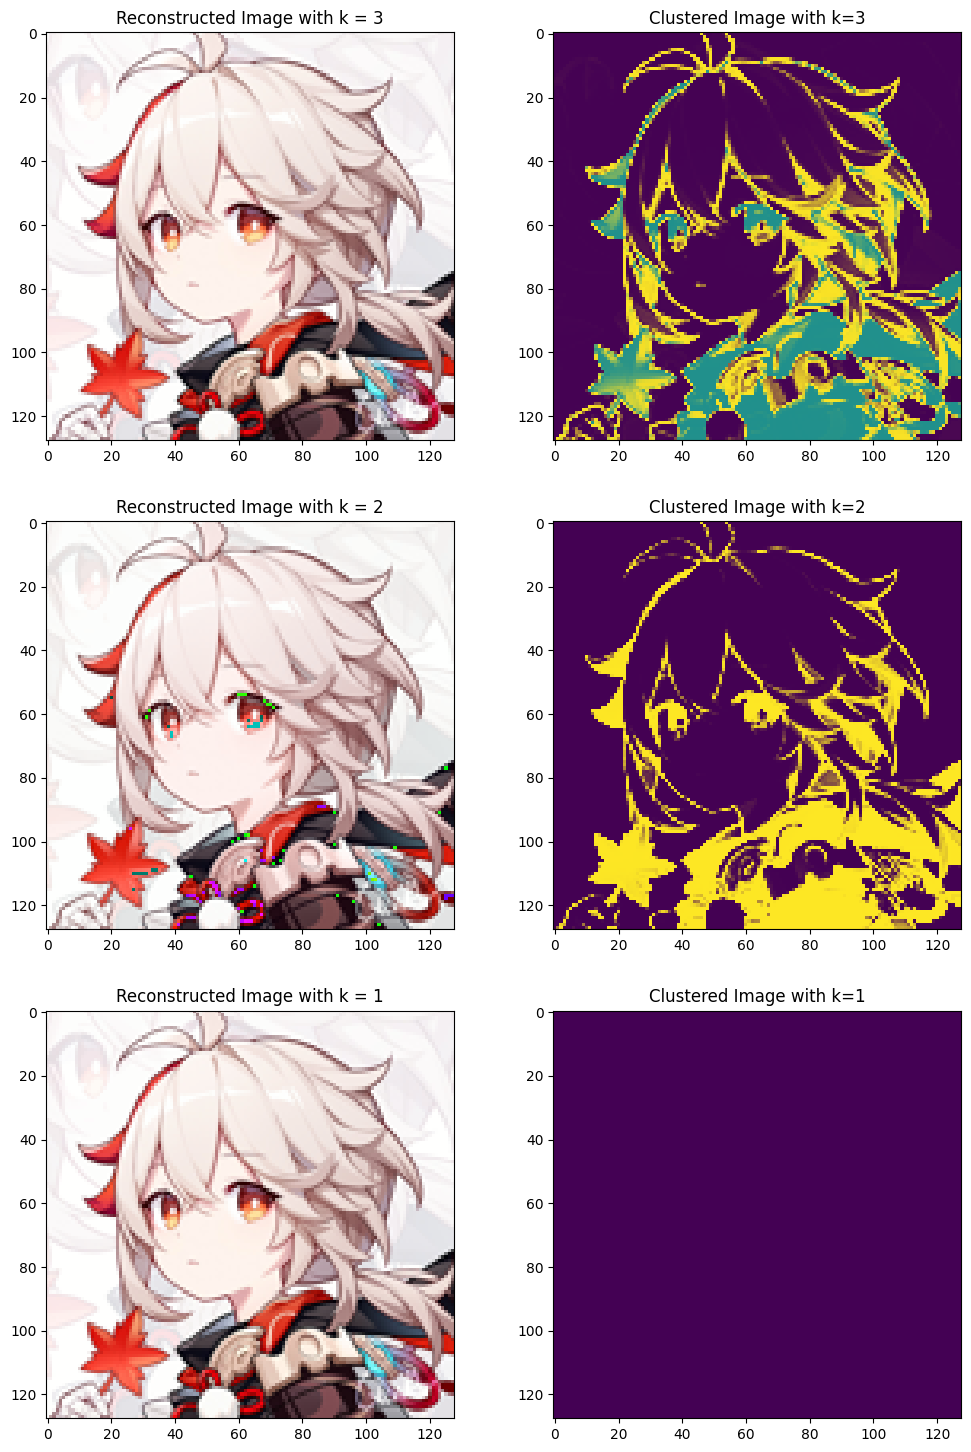

In [173]:
# max_dis = 1
def getPCA_SoftKMeans(softkmeans, X_reconstructed,k):
    # 计算责任矩阵
    responsibilities = softkmeans.calculate_responsibilities(X_reconstructed.reshape(-1, 3))
    
    # 初始化颜色数组
    clustered_colors = np.zeros((size, size, 3))  # 不需要透明度通道，除非你想保存为PNG

    # 获取颜色映射
    colormap = plt.cm.get_cmap('viridis', k)
    
    # 混合颜色
    for i in range(k):
        # 获取第i个聚类的颜色
        cluster_color = np.array(colormap(i)[:3])  # 忽略透明度
        # 更新每个像素的颜色
        for j in range(3):  # RGB通道
            clustered_colors[:, :, j] += responsibilities[:, i].reshape(size, size) * cluster_color[j]

    # 确保颜色值在合法范围内
    clustered_colors = np.clip(clustered_colors, 0, 1)

    return clustered_colors

cl1 = getPCA_SoftKMeans(sk1, sk_img_reconstructed_np1,1)
cl2 = getPCA_SoftKMeans(sk2, sk_img_reconstructed_np2,2)
cl3 = getPCA_SoftKMeans(sk3, sk_img_reconstructed_np3,3)
# plt.figure(figsize=(8, 8))
# plt.imshow(cl)
# plt.title('Soft K-means Clustered Image')
# # plt.axis('off')
# plt.show()

# 
plt.figure(figsize=(12, 18))
#k=3
plt.subplot(3,2, 1)
plt.imshow(sk_img_reconstructed_np3)
plt.title('Reconstructed Image with k = 3')


# 可视化聚类结果
plt.subplot(3,2, 2)
plt.imshow(cl3)
plt.title('Clustered Image with k=3')




# k =2
plt.subplot(3,2, 3)
plt.imshow(img_reconstructed_np2)
plt.title('Reconstructed Image with k = 2')

# 可视化聚类结果
plt.subplot(3,2, 4)
plt.imshow(cl2)
plt.title('Clustered Image with k=2')
# plt.axis('off')  # 不显示坐标轴

# k =1
plt.subplot(3,2, 5)
plt.imshow(sk_img_reconstructed_np3)
plt.title('Reconstructed Image with k = 1')

plt.subplot(3,2, 6)
plt.imshow(cl1)
plt.title('Clustered Image with k=1')

plt.show()